In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from folium.plugins import HeatMap
from datetime import datetime
from datetime import timedelta
import sklearn as sk

In [2]:
brm = pd.read_csv("../resources/bremen.csv")
frb = pd.read_csv("../resources/freiburg.csv")

brm_hourly_driven = pd.read_csv("../generated/brm_hourly_driven.csv")
frb_hourly_driven = pd.read_csv("../generated/frb_hourly_driven.csv")

brm_hourly_weather = pd.read_csv("../generated/brm_hourly_weather.csv")
frb_hourly_weather = pd.read_csv("../generated/frb_hourly_weather.csv")

In [3]:
brm_hourly_driven["trip_duration"] = brm_hourly_driven["trip_duration"].apply(pd.Timedelta)
frb_hourly_driven["trip_duration"] = frb_hourly_driven["trip_duration"].apply(pd.Timedelta)

In [4]:
brm_hourly_combined = brm_hourly_weather.join(brm_hourly_driven["trip_duration"])
frb_hourly_combined = frb_hourly_weather.join(frb_hourly_driven["trip_duration"])

In [5]:
brm_daily = brm_hourly_combined.groupby("day").agg({"trip_duration":"sum","precipitation":"sum","temperature":"mean"})

In [6]:
brm_daily["trip_duration_in_hours"] = brm_daily["trip_duration"].map(lambda x: (x.total_seconds() / 60 / 60))

In [7]:
x = brm_daily.values
x

array([[Timedelta('1 days 15:17:00'), 0.0, -3.0304347826086953,
        39.28333333333333],
       [Timedelta('2 days 01:53:00'), 0.0, -2.8799999999999994,
        49.88333333333333],
       [Timedelta('1 days 16:06:00'), 0.0, -1.7391304347826086, 40.1],
       ...,
       [Timedelta('3 days 13:46:00'), 2.3000000000000007,
        4.037499999999999, 85.76666666666667],
       [Timedelta('3 days 23:47:00'), 0.30000000000000004,
        3.3833333333333333, 95.78333333333333],
       [Timedelta('3 days 19:05:00'), 0.0, 4.504347826086957,
        91.08333333333333]], dtype=object)

In [8]:
x = brm_daily.values
x

array([[Timedelta('1 days 15:17:00'), 0.0, -3.0304347826086953,
        39.28333333333333],
       [Timedelta('2 days 01:53:00'), 0.0, -2.8799999999999994,
        49.88333333333333],
       [Timedelta('1 days 16:06:00'), 0.0, -1.7391304347826086, 40.1],
       ...,
       [Timedelta('3 days 13:46:00'), 2.3000000000000007,
        4.037499999999999, 85.76666666666667],
       [Timedelta('3 days 23:47:00'), 0.30000000000000004,
        3.3833333333333333, 95.78333333333333],
       [Timedelta('3 days 19:05:00'), 0.0, 4.504347826086957,
        91.08333333333333]], dtype=object)

In [9]:
x = brm_daily.values
x

array([[Timedelta('1 days 15:17:00'), 0.0, -3.0304347826086953,
        39.28333333333333],
       [Timedelta('2 days 01:53:00'), 0.0, -2.8799999999999994,
        49.88333333333333],
       [Timedelta('1 days 16:06:00'), 0.0, -1.7391304347826086, 40.1],
       ...,
       [Timedelta('3 days 13:46:00'), 2.3000000000000007,
        4.037499999999999, 85.76666666666667],
       [Timedelta('3 days 23:47:00'), 0.30000000000000004,
        3.3833333333333333, 95.78333333333333],
       [Timedelta('3 days 19:05:00'), 0.0, 4.504347826086957,
        91.08333333333333]], dtype=object)

In [10]:
x = brm_daily.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
demand = pd.DataFrame(x_scaled)

NameError: name 'preprocessing' is not defined

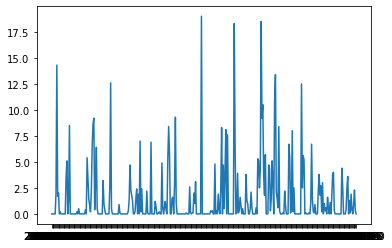

In [11]:
plt.plot(brm_daily["precipitation"])
plt.show()

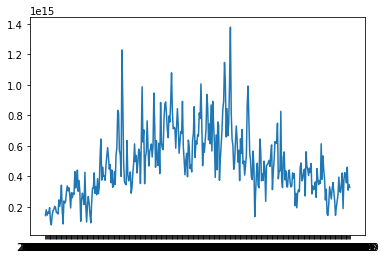

In [12]:
plt.plot(brm_daily["trip_duration"])
plt.show()

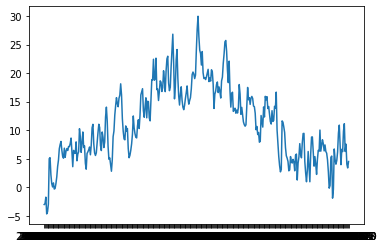

In [13]:
plt.plot(brm_daily["temperature"])
plt.show()